# Entities


In [1]:
import pickle

from collections import Counter
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [2]:
with open("conversations.pkl", "rb") as handle:
    convos = pickle.load(handle)

---
## People

 - much fewer unique persons the number of their occurences (about 10 times less) -> people engage multipe times (on average)
 - not many people are both senders and receivers of e-mails (overlap less than 15%)
 - (roughly) power-law distributions in number of times each person engaged as a sender (similar for receiver role) <br>
   -> few people engage in many conversations, many engage in few 
 - positive correlation at least in high numbers between sender and receiver engagements <br>
   (-> people who send many e-mails also receive many, see plot) <br>
   however, overall Spearman rank-correlation negative, indicating that overall, people either send or receive

In [32]:
people = {p for c in convos for p in c.interlocutors}
sender_counts, receiver_counts = Counter([p for c in convos for p in c.senders]), Counter([p for c in convos for p in c.receivers])


# jaccard = len(set(sender_counts) & set(receiver_counts))/\
#             len(set(sender_counts) | set(receiver_counts))

print("Number of person occurrences:\t", len([p for c in convos for p in c.interlocutors]), "(2x the number of e-mails)")
print("Number of unique people:\t", len(people))
print("Number of unique senders:\t", len(sender_counts))
print("Number of unique receivers:\t", len(receiver_counts), 
      "\t(overlap: ", round(1-len(people)/(len(sender_counts) + len(receiver_counts)), 3), ")")

Number of person occurrences:	 287926 (2x the number of e-mails)
Number of unique people:	 28097
Number of unique senders:	 18886
Number of unique receivers:	 13855 	(overlap:  0.142 )


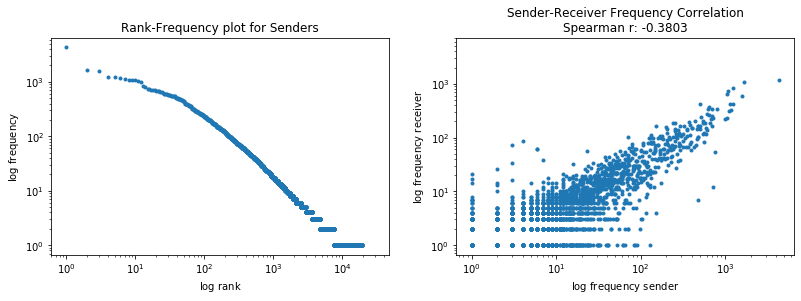

Most common senders:
  Charles McCathieNevile <charles@w3.org> :      4290 times
  Brian McBride <bwm@hplb.hpl.hp.com>     :      1659 times
  Ian Jacobs <ij@w3.org>                  :      1594 times

Most common receivers:
   <w3c-wai-ig@w3.org>                    :      4728 times
   <w3c-wai-gl@w3.org>                    :      3567 times
   <svg-testsuite-comments@w3.org>        :      3295 times


In [57]:
# sender_ranks, sender_freqs = None

people_sorted = sorted(people, key=lambda p: sender_counts[p], reverse=True)
ranks = list(range(1, len(people_sorted)+1))

send_freqs = [sender_counts[p] for p in people_sorted]
receive_freqs = [receiver_counts[p] for p in people_sorted]
corr = spearmanr(receive_freqs, send_freqs)

fig, axs = plt.subplots(ncols=2, figsize=(12, 4)); fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
axs[0].loglog(ranks, send_freqs, '.'); axs[0].set_title("Rank-Frequency plot for Senders"); axs[0].set_xlabel("$\log$ rank"); axs[0].set_ylabel("$\log$ frequency")
axs[1].loglog(send_freqs, receive_freqs, '.'); axs[1].set_title("Sender-Receiver Frequency Correlation\nSpearman r: " + str(corr.correlation.round(4))); axs[1].set_xlabel("$\log$ frequency sender"); axs[1].set_ylabel("$\log$ frequency receiver")
plt.show()

print("Most common senders:")
for rt, f in sender_counts.most_common(3):
    print("  {:<40}:{:>10} times".format(str(rt), str(f)))

print("\nMost common receivers:")
for rt, f in receiver_counts.most_common(3):
    print("  {:<40}:{:>10} times".format(str(rt), str(f)))


---
## Organisations

 - the number of unique organisations is about half the number of unique people <br>
   -> on average, about 2 people belong to the same organisation
 - w3.org is (of course) by far the most common organisation, the rest of the organisations follow a power-law in terms of appearance in the corpus
 - power-laws everywhere: the sizes of organisation in terms of number of people also follow a power law, with w3.org of course on top <br>
   notice that the following three (hotmail, yahoo and msn) should strictly speaking not be counted as organisations

In [157]:
orgs = {o for c in convos for o in c.orgs}

org_counts = Counter([o for c in convos for o in c.orgs])

print("Number of unique orgs:\t", len(orgs))

print("\nMost frequent orgs: ")
for rt, f in org_counts.most_common(5):
    print("  {:<17}:{:>10} times".format(str(rt), str(f)))

Number of unique orgs:	 11848

Most frequent orgs: 
  w3.org           :    103956 times
  hplb.hpl.hp.com  :      5650 times
  us.ibm.com       :      3991 times
  microsoft.com    :      3047 times
  acm.org          :      2779 times


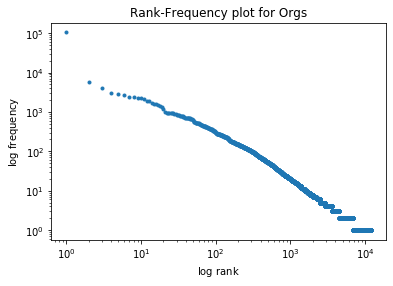

In [89]:
ranks = list(range(1, len(orgs)+1)); org_freqs = [f for o, f in org_counts.most_common()]
plt.loglog(ranks, org_freqs, '.')
plt.title("Rank-Frequency plot for Orgs"); plt.xlabel("$\log$ rank"); ylbl = plt.ylabel("$\log$ frequency")


Orgs with the most people: 
  w3.org         :      2067 people
  hotmail.com    :      1106 people
  yahoo.com      :       700 people
  msn.com        :       263 people
  tux.w3.org     :       251 people


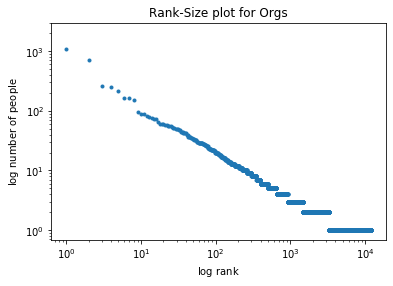

In [120]:
org_person_tuples = {(p.org, p) for c in convos for p in c.interlocutors}

people_per_org = {}
for o, p in org_person_tuples:
    if not o in people_per_org:
        people_per_org[o] = []
    people_per_org[o].append(p)

lens = sorted(map(len, people_per_org.values()), reverse=True)
plt.loglog(list(range(len(orgs))), lens, '.')
plt.title("Rank-Size plot for Orgs"); plt.xlabel("$\log$ rank"); ylbl = plt.ylabel("$\log$ number of people")
    
biggest_orgs = sorted(people_per_org.items(), key=lambda tup: len(tup[1]), reverse=True)
print("\nOrgs with the most people: ")
for o, p_ls in biggest_orgs[:5]:
    print("  {:<15}:{:>10} people".format(str(o), str(len(p_ls))))

---
## Documents

 - on average, each conversation mentions around 4 documents (links or addresses), although there is massive spread
 - more power laws: some links or addresses are mentioned across many covnersations, many only once

Number of unique mentioned links:	 248393
Number of unique mentioned addresses:	 189336


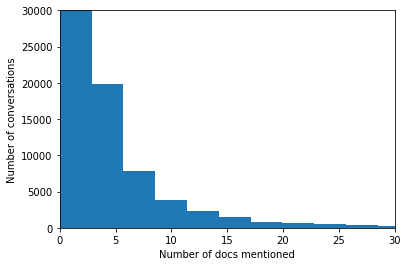

In [165]:
links = {l for c in convos for l in c.mentioned_links}; addrs = {l for c in convos for l in c.mentioned_addresses}
docs = links | addrs

print("Number of unique mentioned links:\t", len(links))
print("Number of unique mentioned addresses:\t", len(addrs))

docs_per_convo = [c.mentioned_links + c.mentioned_addresses for c in convos]

plt.hist(list(map(len, docs_per_convo)), bins=1000)
plt.xlim((0, 30)); plt.ylim((0, 30000)); plt.xlabel("Number of docs mentioned"); y = plt.ylabel("Number of conversations")


 Most mentioned docs: 
  http://www.w3.org/WAI                   :      5652 conversations
  charles@w3.org                          :      3507 conversations
  w3c-dist-auth-request@w3.org            :      3014 conversations
  http://www.w3.org/People/Jacobs         :      2967 conversations
  jongund@uiuc.edu                        :      2928 conversations
  http://www.w3.org/People/Charles        :      2735 conversations
  http://www.staff.uiuc.edu/~jongund      :      2634 conversations


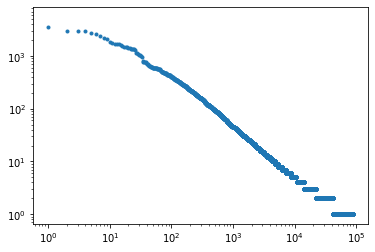

In [158]:
# conv_doc_tuples = [(d, c) for c in convos for d in c.mentioned_links + c.mentioned_addresses]
conv_doc_tuples = [(a.address, c) for c in convos for a in c.mentioned_addresses] +\
                    [(l.url, c) for c in convos for l in c.mentioned_links]
                            

convs_per_doc = {}
for d, c in conv_doc_tuples:    
    if not d in convs_per_doc:
        convs_per_doc[d] = []
    convs_per_doc[d].append(c)
    
lens = sorted(map(len, convs_per_doc.values()), reverse=True)
plt.loglog(list(range(len(convs_per_doc))), lens, '.')


biggest_docs = sorted(convs_per_doc.items(), key=lambda tup: len(tup[1]), reverse=True)
print("\n Most mentioned docs: ")
for o, p_ls in biggest_docs[:7]:
    print("  {:<40}:{:>10} conversations".format(str(o), str(len(p_ls))))